# Estudo - Séries Temporais

# O que são dados de série temporal ?


**São dados obtidos pela medição de uma variável ao longo do tempo. Ou seja, são dados que possuem uma ordem definido pelo tempo em que ocorreu a retirada da amostra.**

**Exemplos desses dados são: Dados de temperatura, umidade, volume de chuva, medidas a cada segundo, hora, dia, semana, mês, ano...etc**

---

Para estudar esse tipo de dados, vamos utilizar um dataset com medidas de temperatura, umidade, nível de iluminação e concentração de CO2 a cada minuto, durante 5 dias obtidas nesse [link](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+)

Porém, só iremos utilizar uma versão reduzida desse dataset: https://leadfortaleza.com.br/ead2pcd/conteudo/tmp/myopenolat_1_103418176760922/aula/arquivos/dados.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [3]:
df= pd.read_csv('dados.txt')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2015-02-04 18:49:59,22.290,27.3900,0.0,621.00,0.004559
1,2015-02-04 19:50:00,21.890,27.1000,0.0,548.50,0.004401
2,2015-02-04 20:50:00,21.600,26.4725,0.0,509.75,0.004222
3,2015-02-04 21:49:59,21.445,25.7450,0.0,488.00,0.004067
4,2015-02-04 22:50:00,21.290,25.7000,0.0,467.00,0.004021


As colunas da tabela representam, da esquerda para a direita, a data da coleta do dado, a temperatura do quarto em graus Celsius, a umidade relativa do ar, o nível de luminosidade, a concentração de CO2 e a proporção de umidade, que é calculada a partir da umidade relativa e da temperatura.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           135 non-null    object 
 1   Temperature    135 non-null    float64
 2   Humidity       135 non-null    float64
 3   Light          135 non-null    float64
 4   CO2            135 non-null    float64
 5   HumidityRatio  135 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.5+ KB


In [5]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,135.000000,135.000000,135.000000,135.000000,135.000000
mean,20.604877,25.700698,127.757407,605.304938,0.003854
std,1.010573,5.536637,197.846315,315.679958,0.000852
min,19.100000,17.033333,0.000000,418.500000,0.002689
25%,19.722500,20.211667,0.000000,439.500000,0.003070
50%,20.390000,26.222500,0.000000,454.000000,0.003802
75%,21.340000,30.457500,342.500000,628.375000,0.004340
max,23.100000,38.845000,546.333333,2000.250000,0.006410


### Análise exploratória

**Vamos começar explorando o dataset usando um gráfico de dispersão**

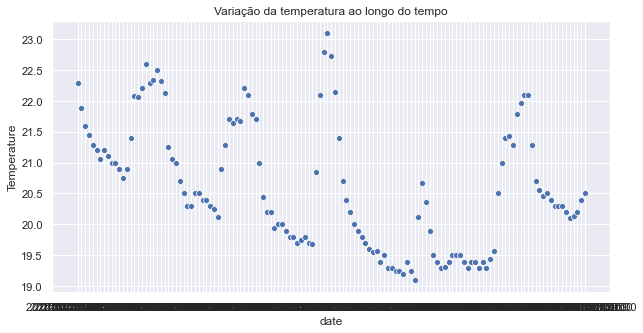

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='date', y = 'Temperature', data=df)
plt.title('Variação da temperatura ao longo do tempo')
plt.show()

**Análise**

Observe que o gráfico os dados no gráfico possuem uma mesma distância de tempo, isso ocorre porque o sensor que colheu as informações efetua a amostragem em um instante de tempo constante. Infelizmente o gráfico de dispersão não possui características que consiga explorar melhor esse atributo de dados de série temporais.

Ainda se referindo a variável de **date**, podemos observar que o seu eixo está ilegível. Como os dados de data estão em texto o pandas interpreta como uma variável categória e ao tentar inserir tudo no eixo referênte, acaba não tornando inteligível essas informações. Para burlar essa situação, podemos utilizar o método do pandas `to_datetime()` para converter o tempo no tipo `datetime`, que é específico para uma variável contínua como o tempo. 

### Efetuando conversão do tempo e utilizando gráfico de linha

**Para explorar melhor o atributo contínuo de uma série temporal utilizaremos um gráfico de linha definido pelo método `sns.lineplot()`. O gráfico de linha conecta os pontos plotados e permite, no caso de uma dados de uma série temporal, ter uma melhor percepção da continuidade da variável ao longo do tempo** 

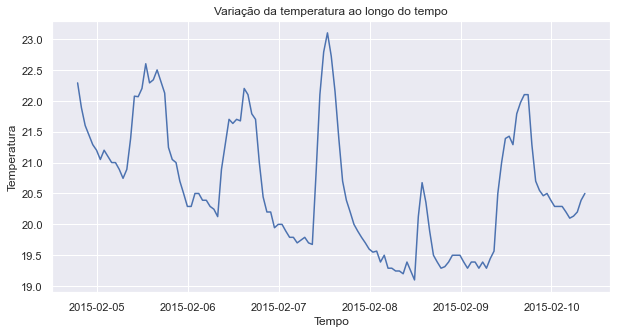

In [10]:
df['date'] = pd.to_datetime(df['date']) # Efetuando conversão do tempo em str para tempo em datetime
plt.figure(figsize=(10,5))
sns.lineplot(x='date', y='Temperature', data=df)
plt.title('Variação da temperatura ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')

plt.show()

**Análise**

alguns padrões podem ser observados. Por exemplo, parece haver um ciclo diário na variação da temperatura, que diminui durante a madrugada, cresce durante o dia, atinge o pico pela tarde e passa a diminuir até o fim do dia (o início de cada dia, ou seja, as 00:00, é marcado no eixo x). Observe que houve uma mudança de comportamento no dia 07, com um pico incomum, que pode ter sido causado pela presença de pessoas no quarto.

**Observação quanto a medição**

Um detalhe importante sobre essa série temporal: é que foi feita exatamente uma medição em cada momento. Isso nem sempre é o caso. Por exemplo, como as medidas de sensores variam conforme a calibração, poderia se ter utilizado mais de um sensor de temperatura, tirando mais de uma medição por momento, para se obter um resultado mais preciso

## Analisando observações coletadas em outro dataset

**Em alguns casos, as observações para uma única variável são múltiplas um único intervalo de tempo. Quando isso acontece, o seaborn agrega os valores em uma única linha na visualização como uma média das observações e exibindo uma área sombreada na representação visual como o intervalo de confiança para o valor coletado.**

---
Observamos esse comportamento no dataset abaixo. Ele contém dados da incidência do vírus HIV ao longo de mais de 20 anos para diversos países, como os dados são observados em vários países, é comum notar que há várias amostras em um único ano. 

In [12]:
hiv_uri = 'https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/hiv_data.txt'
hiv = pd.read_csv(hiv_uri)
hiv.head()

,country,date,HIV Rate,Income Level
0,Australia,2017,0.1,HIC
1,Australia,2016,0.1,HIC
2,Australia,2015,0.1,HIC
3,Australia,2014,0.1,HIC
4,Australia,2013,0.1,HIC


In [16]:
# Múltiplas observações em um único ano
hiv[hiv['date']==2016]

,country,date,HIV Rate,Income Level
1,Australia,2016,0.1,HIC
29,"Bahamas, The",2016,0.6,HIC
57,Barbados,2016,0.3,HIC
85,Chile,2016,0.2,HIC
113,Czech Republic,2016,0.1,HIC
...,...,...,...,...
3697,Togo,2016,0.5,LIC
3725,Tajikistan,2016,0.1,LIC
3753,Tanzania,2016,1.2,LIC
3781,Uganda,2016,1.2,LIC


As colunas do DataFrame correspondem ao país, a data, a taxa de HIV e a uma classificação socioeconômica de nível de renda médio da população, que pode ser HIC (alto nível de renda), MIC (médio nível de renda) e LIC (baixo nível de renda). Com esses dados, pode-se explorar a tendência da taxa de HIV ao longo dos anos no mundo, por nível de renda ou por países individualmente. Perceba que, ao criar um gráfico com a taxa de HIV global, são consideradas, para cada ano, as medições em vários países. Como representar essas várias medições em uma mesma linha? Confira a seguir.

**Vamos visualizar a taxa de HIV ao longo dos anos**

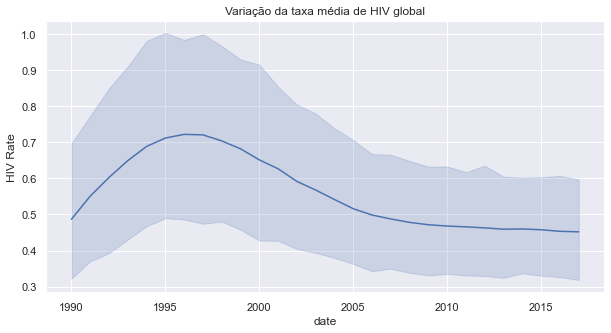

In [13]:
plt.figure(figsize=(10,5))
plt.title('Variação da taxa média de HIV global')
sns.lineplot(x="date", y="HIV Rate", data=hiv)
plt.show()


**Já foi provado anteriormente que o daset contém dados de vários países em um único ano. Foi dito também que para representar isso, o seaborn exibi a média dos dados em uma única linha e em torno dela, plota uma região sombreada atribuida ao intervalo de confiança dos dados, ou seja, o provável intervalo em torno da média onde os dados coletados podem ser encontrados com alguma certeza.**


Um intervalo de confiança grande indica que os dados em um intervalo de tempo variam muito si, no caso, as taxas de hiv variam muito entre os países naquela época. O fato do intervalo de confiança permanecer grande ao longo de todas as coletas indica que essa variação em cada ano é constante e não fruto de um evento excepcional

Perceba que a taxa média (linha) teve um crescimento entre os anos 1995 e 2000, mas logo passou a diminuir e se estabilizou entre os anos de 2010 e 2015. Isso pode ser observado de maneira mais limpa em um gráfico sem o intervalo de confiança


---
**Podemos exibir apenas a linha modificando o atributo `ci` para `None`**

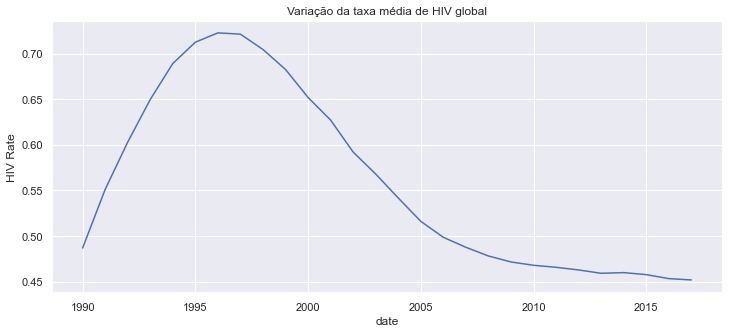

In [18]:
plt.figure(figsize=(12,5))
sns.lineplot(x=hiv['date'], y=hiv['HIV Rate'], ci=None)
plt.title('Variação da taxa média de HIV global')
plt.show()

### Analisando taxa média de hiv por nível de renda dos países

**Inserindo atributos como `hue`, `size` e `style`, podemos observar mais de uma variável ao longo do tempo de diferentes formas**

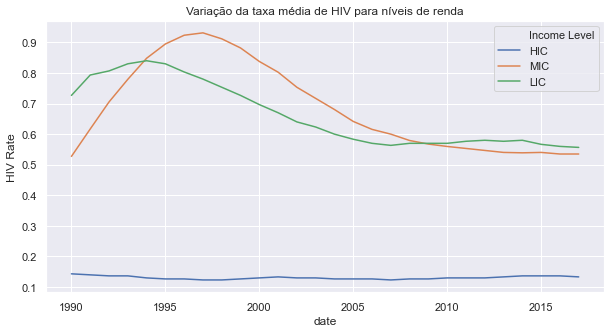

In [30]:
plt.figure(figsize=(10,5))
plt.title('Variação da taxa média de HIV para níveis de renda')
sns.lineplot(x='date', y='HIV Rate', hue='Income Level', ci=None, data=hiv)
plt.show()

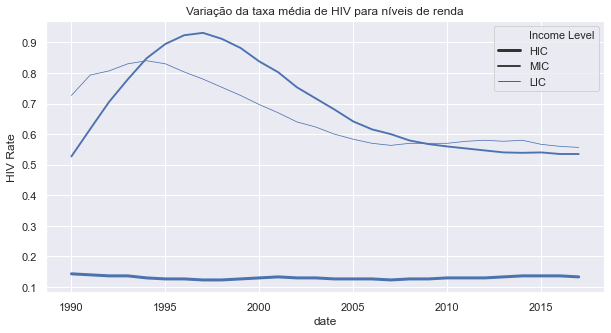

In [23]:
plt.figure(figsize=(10,5))
plt.title('Variação da taxa média de HIV para níveis de renda')
sns.lineplot(x='date', y='HIV Rate', size='Income Level', ci=None, data=hiv)
plt.show()

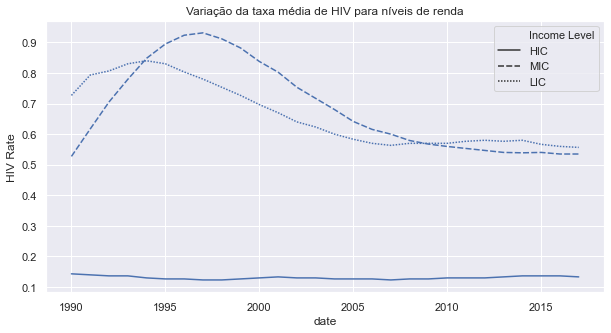

In [24]:
plt.figure(figsize=(10,5))
plt.title('Variação da taxa média de HIV para níveis de renda')
sns.lineplot(x='date', y='HIV Rate', style='Income Level', ci=None, data=hiv)
plt.show()

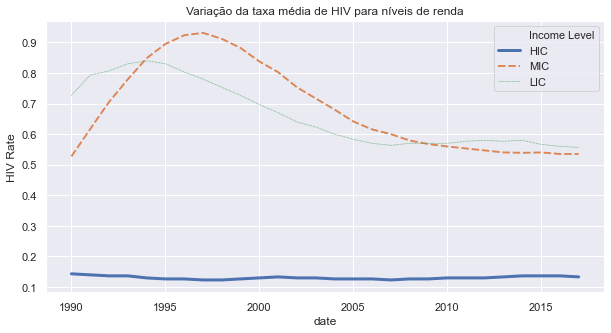

In [29]:
plt.figure(figsize=(10,5))
plt.title('Variação da taxa média de HIV para níveis de renda')
sns.lineplot(x='date', y='HIV Rate', hue='Income Level', size='Income Level', style='Income Level', ci=None, data=hiv)
plt.show()

**Análise**

Perceba que paaíses de baixa e média renda (LIC e MIC) tiveram e tem taxas de HIV mais altas do que países de renda alta (HIC).

Analisando somente taxas em países de baixa renda e de média renda, notamos que os paíse de baixa renda atingiram o pico mais cedo e logo declinara, enquanto os países de média renda chegaram ao pica posteriormente e tiveram um declínio mais suave, se mantendo em declínio com taxa superio aos de baixa renda até meados de 2009, onde passaram a ter uma taxa menor.

**Vamos analisar esse comportamento em todos os países de forma separada**

Essa análise se faz necessária pois nos gráficos anteriores analisamos somente a média, que pode ser deturpada pela variação de valores entre os países

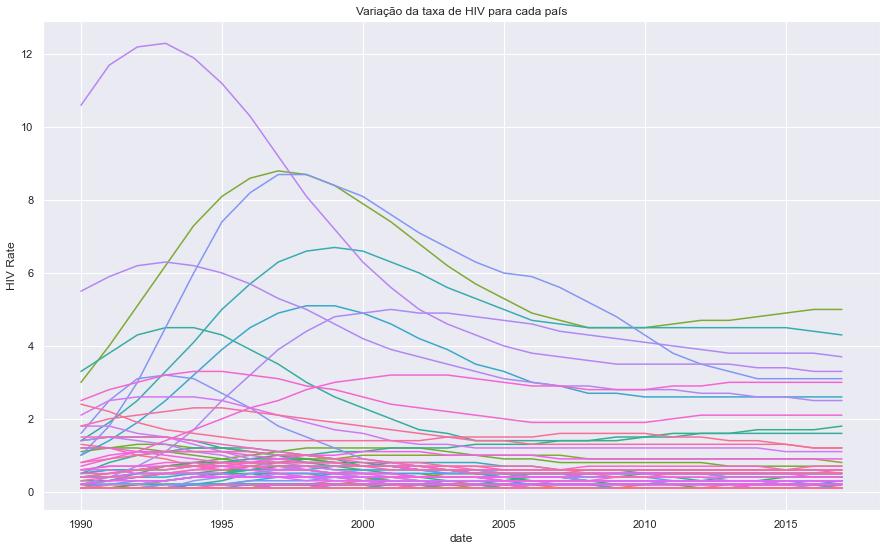

In [38]:
plt.figure(figsize=(15,9))
plt.title('Variação da taxa de HIV para cada país')
a = sns.lineplot(x='date', y = 'HIV Rate', hue='country', legend=False,  data=hiv)
# a.legend(bbox_to_anchor=(1.01, 1), ncol=5) -> Colocando a legenda para fora e dividindo ela em 5 colunas
plt.show()

**Análise**

Note que a visualização se torna muito complicada quando temos muitos países. Entretanto, é possível observar um comportamento comum de pico e declínio em todos os países.

Para uma visualização melhor, seria interessante separar em subvisualizações em grade, onde poderia ter 3 gráficos diferente representando países de diferentes rendas